### SINGLE PERCEPTRON

In [5]:
# IMPORT LIBRARY
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.metrics import classification_report, accuracy_score
from importlib import reload

warnings.filterwarnings('ignore')

In [54]:
# READ DATASET
dataset = pd.read_csv('heart.csv')
data = dataset.iloc[:,0:-1]
label = dataset.iloc[:,-1]

In [48]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [51]:
label

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [67]:
# MODEL SINGLE LAYER PERCEPTRON
model_slf = Perceptron(tol=None, random_state=60, penalty='l1')
model_slf.fit(data, label)

# Memprediksi Label
predicted_label = model_slf.predict(data)

# Evaluasi Model
print("Score : ", model_slf.score(data, label))
report = classification_report(label, predicted_label)
print("Classification Report:")
print(report)

Score :  0.834983498349835
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       138
           1       0.79      0.94      0.86       165

    accuracy                           0.83       303
   macro avg       0.85      0.82      0.83       303
weighted avg       0.85      0.83      0.83       303



In [18]:
# VISUALISASI DATA
plt.figure(figsize=(10, 6))
plt.bar(label, score, color=['blue', 'green', 'orange', 'red'])
plt.title("Kinerja Model (Single Layer Perceptron) pada Heart Disease")
plt.ylabel("Skor")
plt.ylim(0, 1.0)  # Skala sumbu y dari 0 hingga 1
plt.show()

AttributeError: 'Perceptron' object has no attribute 'loss_curve_'

### MULTI LAYER PERCEPTRON

In [19]:
# READ DATASET
dataset = pd.read_csv('heart.csv')
data = dataset.iloc[:,0:-1]
label = dataset.iloc[:,-1]

Accuracy Score : 0.5445544554455446
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       138
           1       0.54      1.00      0.71       165

    accuracy                           0.54       303
   macro avg       0.27      0.50      0.35       303
weighted avg       0.30      0.54      0.38       303



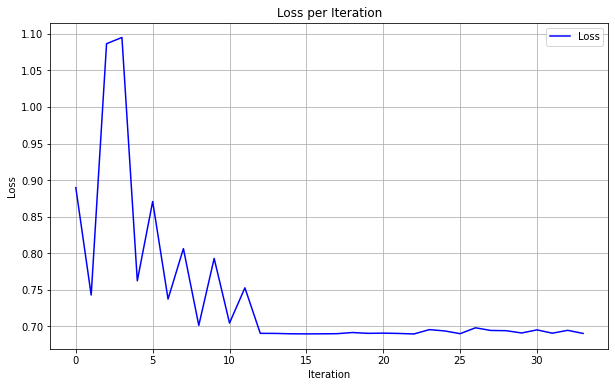

In [78]:
# MODEL MLP
model_mlp = MLP(hidden_layer_sizes=(10), activation = 'logistic', 
            learning_rate_init=1, tol=0, random_state=10)
model_mlp.fit(data, label)

# Menghitung akurasi
print('Accuracy Score :', model_mlp.score(data, label))
score = classification_report(label, model_mlp.predict(data))
print("Classification Report:")
print(score)

# Membuat plot loss curve
loss_values = model_mlp.loss_curve_
plt.figure(figsize=(10, 6))
plt.title("Loss per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()
plt.plot(loss_values, '-', color="b", label="Loss")
plt.legend(loc="best")
plt.show()

Accuracy Score : 0.8514851485148515
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       138
           1       0.85      0.88      0.87       165

    accuracy                           0.85       303
   macro avg       0.85      0.85      0.85       303
weighted avg       0.85      0.85      0.85       303

